## Overview

- In this notebook, I am predicitng housing prices using King County Data. I'll be working on a developing linear regression models & XGBoost
- You can find a detailed report attached

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from yellowbrick.regressor import ResidualsPlot
from sklearn.metrics import median_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn_extensions.non_negative_garotte import NonNegativeGarrote
import matplotlib.style as style
from scipy.stats import skew  # for some statistics
import xgboost as xgb
from scipy.stats import kstest
from sklearn.preprocessing import scale
from scipy import stats
from sklearn import metrics
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = pd.read_csv (r'D:\ZillowInterview\DataScience ZExercise_TRAINING_CONFIDENTIAL1.csv',index_col = 'PropertyID')
df_test = pd.read_csv (r'D:\ZillowInterview\Data Science ZExercise_TEST_CONFIDENTIAL2.csv',index_col = 'PropertyID')

##### Sample of the data shows the column and data types

In [4]:
df.head()     

,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,...,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge
PropertyID,,,,,,,,,,,,,,,,,,,,,
48648941,285000.0,5/23/2015,5.300000e+11,R7,9,4.0,2.00,1900.0,480.0,7482,...,47321389,-122213716,107800.0,844.0,1975.0,0.6685,0.0780,42854,0.1924,48.6
48648982,309950.0,8/22/2015,5.300000e+11,R8P,9,3.0,2.00,2170.0,320.0,14208,...,47482082,-122244269,181500.0,925.0,1969.0,0.5753,0.0192,54013,0.3718,42.6
48649024,476000.0,8/27/2015,5.300000e+11,SF 7200,9,4.0,1.00,2150.0,590.0,6500,...,47561383,-122308083,344300.0,733.0,1946.0,0.6331,0.0000,56782,0.3207,40.7
48649040,324950.0,7/1/2015,5.300000e+11,R1,9,4.0,2.25,2560.0,NaN,15767,...,47387929,-122279389,284200.0,900.0,1977.0,0.5456,0.0573,44200,0.3359,40.0
48649057,325000.0,6/20/2015,5.300000e+11,LDR,9,4.0,1.75,1720.0,NaN,8620,...,47477068,-122263852,290100.0,802.0,1972.0,0.4267,0.0551,65282,0.1633,44.4


##### Summary statistics 

In [5]:
df.describe()

,SaleDollarCnt,censusblockgroup,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,BuiltYear,...,Latitude,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge
count,1.158800e+04,1.158800e+04,11588.0,11588.000000,11588.000000,11588.000000,8747.000000,1.158800e+04,11588.000000,11588.000000,...,1.158800e+04,1.158800e+04,1.158200e+04,8957.000000,11341.000000,11588.000000,11588.000000,11588.000000,11588.000000,11588.000000
mean,6.137157e+05,5.300000e+11,9.0,3.451800,2.327628,2199.899249,490.981022,1.601437e+04,1.528571,1975.423097,...,4.755070e+07,-1.221995e+08,4.337194e+05,1235.541699,1973.356406,0.747764,0.050873,94859.222817,0.360058,39.772886
std,4.577593e+05,0.000000e+00,0.0,0.865682,0.872601,936.877939,220.434500,4.324446e+04,0.521864,28.053849,...,1.424218e+05,1.417068e+05,1.781283e+05,394.371247,17.786514,0.196277,0.058676,36285.661949,0.140494,6.726432
min,2.000000e+04,5.300000e+11,9.0,1.000000,0.750000,270.000000,10.000000,1.034000e+03,1.000000,1900.000000,...,4.716120e+07,-1.225150e+08,1.480000e+04,185.000000,1939.000000,0.000000,0.000000,17500.000000,0.000000,18.200000
25%,3.550000e+05,5.300000e+11,9.0,3.000000,1.750000,1530.000000,380.000000,5.683750e+03,1.000000,1957.000000,...,4.744830e+07,-1.223147e+08,3.020000e+05,933.000000,1960.000000,0.618700,0.000000,69167.000000,0.260700,35.000000
50%,5.050000e+05,5.300000e+11,9.0,3.000000,2.500000,2060.000000,476.000000,7.886500e+03,2.000000,1979.000000,...,4.756348e+07,-1.222056e+08,3.969000e+05,1173.000000,1975.000000,0.802200,0.038900,90455.000000,0.352600,39.400000
75%,7.150000e+05,5.300000e+11,9.0,4.000000,3.000000,2700.000000,600.000000,1.111100e+04,2.000000,1999.000000,...,4.767496e+07,-1.221112e+08,5.256000e+05,1508.000000,1987.000000,0.903800,0.080800,114306.000000,0.444200,43.800000
max,7.880000e+06,5.300000e+11,9.0,9.000000,9.500000,12130.000000,7504.000000,1.157824e+06,3.000000,2015.000000,...,4.785848e+07,-1.211670e+08,1.000001e+06,2001.000000,2005.000000,1.000000,0.638400,250001.000000,0.934100,70.200000


##### There seems to be a house with 9.5 bathrooms. Seems like an outlier but it is actually a big house

In [6]:
df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]  #Training data

ViewType            8956
GarageSquareFeet    2841
BGMedRent           2631
BGMedYearBuilt       247
BGMedHomeValue         6
dtype: int64

In [7]:
df_test.isnull().sum().sort_values(ascending = False)[df_test.isnull().sum().sort_values(ascending = False) != 0]  #Testing Data

SaleDollarCnt       4402
ViewType            3404
GarageSquareFeet    1138
BGMedRent            963
BGMedYearBuilt        62
BGMedHomeValue         7
dtype: int64

------------------------------------------------------------------------------------------------------------------------------

## Missing values
Fill the missing values in the datasets

- ViewType: Missing data is simply the absence of a view. Hence, replaced with 0
- GarageSquareFeet: This is also technically not missing. It just means garage is absent. Replace with 0
- Rest of the numerical data is replaced by the mean of that column
- SaleDollarCnt in testing set will be dropped anyways since that is our target variable

In [8]:
# Training Dataset
df['GarageSquareFeet'] = df['GarageSquareFeet'].fillna(0)      # Fill Nans with 0 (No Garage)
df['ViewType'] = df['ViewType'].fillna(0)                      # Fill Nans with 0 (No View)
df['BGMedHomeValue'] = df['BGMedHomeValue'].transform( lambda x: x.fillna(x.mean()))     #Replace Nans with mean
df['BGMedYearBuilt'] = df['BGMedYearBuilt'].transform( lambda x: x.fillna(x.mean()))     #Replace Nans with mean
df['BGMedRent'] = df['BGMedRent'].transform( lambda x: x.fillna(x.mean()))     #Replace Nans with mean
df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]

Series([], dtype: int64)

In [9]:
#Testing Dataset

df_test['GarageSquareFeet'] = df_test['GarageSquareFeet'].fillna(0)      # Fill Nans with 0 (No Garage)
df_test['ViewType'] = df_test['ViewType'].fillna(0)                      # Fill Nans with 0 (No View)
df_test['BGMedHomeValue'] = df_test['BGMedHomeValue'].transform( lambda x: x.fillna(x.mean()))     #Replace Nans with mean
df_test['BGMedYearBuilt'] = df_test['BGMedYearBuilt'].transform( lambda x: x.fillna(x.mean()))     #Replace Nans with mean
df_test['BGMedRent'] = df_test['BGMedRent'].transform( lambda x: x.fillna(x.mean()))     #Replace Nans with mean
df_test.isnull().sum().sort_values(ascending = False)[df_test.isnull().sum().sort_values(ascending = False) != 0]

SaleDollarCnt    4402
dtype: int64

------------------------------------------------------------------------------------------------------------------------------

## Feature Engineering

- Proportion of Finished Square Feet
- BGMedYearBuilt 
- YearBuilt
- Month
- ViewType

In [10]:
#Feature Engineering Training Dataset
df['month'] = pd.DatetimeIndex(df.loc[:,'TransDate']).month #Create month column
df['BuiltYear'] = 2015 - df['BuiltYear']
df['BGMedYearBuilt'] = 2015 - df['BGMedYearBuilt']
df['Proportion'] = df['FinishedSquareFeet']/df['LotSizeSquareFeet']

In [11]:
#Feature Engineering testing Dataset
df_test['month'] = pd.DatetimeIndex(df_test.loc[:,'TransDate']).month #Create month column
df_test['BuiltYear'] = 2015 - df_test['BuiltYear']
df_test['BGMedYearBuilt'] = 2015 - df_test['BGMedYearBuilt']
df_test['Proportion'] = df_test['FinishedSquareFeet']/df_test['LotSizeSquareFeet']

In [12]:
df_test

,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,...,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,month,Proportion
PropertyID,,,,,,,,,,,,,,,,,,,,,
48735321,NaN,10/31/2015,5.300000e+11,SF 9600,9,5.0,4.000000,5540,0.0,25338,...,527700.0,1750.0,59.0,0.9134,0.1061,113450,0.2524,49.6,10,0.218644
48735471,NaN,11/6/2015,5.300000e+11,SF 9600,9,5.0,3.000000,2470,510.0,26006,...,527700.0,1750.0,59.0,0.9134,0.1061,113450,0.2524,49.6,11,0.094978
49128764,NaN,10/17/2015,5.300000e+11,SF 7200,9,4.0,2.000000,1680,0.0,8743,...,527700.0,1750.0,59.0,0.9134,0.1061,113450,0.2524,49.6,10,0.192154
48897535,NaN,11/19/2015,5.300000e+11,SF 7200,9,2.0,1.000000,990,260.0,12219,...,527700.0,1750.0,59.0,0.9134,0.1061,113450,0.2524,49.6,11,0.081021
49083957,NaN,12/15/2015,5.300000e+11,SF 9600,9,4.0,3.000000,2960,550.0,23568,...,527700.0,1750.0,59.0,0.9134,0.1061,113450,0.2524,49.6,12,0.125594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49034257,NaN,12/16/2015,5.300000e+11,RA2.5,9,3.0,2.000000,1420,0.0,13590,...,180600.0,507.0,44.0,0.6477,0.6384,26979,0.1317,48.5,12,0.104489
49101515,NaN,12/8/2015,5.300000e+11,F,9,2.0,2.560000,730,0.0,11758,...,180600.0,507.0,44.0,0.6477,0.6384,26979,0.1317,48.5,12,0.062085
49092758,NaN,10/6/2015,5.300000e+11,RA2.5,9,2.0,1.000000,770,0.0,15141,...,180600.0,507.0,44.0,0.6477,0.6384,26979,0.1317,48.5,10,0.050855


#### I used one-hot encoding for viewtype but realized it won't scale across datasets as not all ViewTypes will be present. Instead I went with the 0s for no view type and rest same. I also used a label encoder but did not find marked performance differences. Included below nonetheless

In [13]:
# Creates one-hot encoding vectors for ViewType & ZoneCodeCounty (not used)

'''
dummies = pd.get_dummies(df.ViewType, prefix='ViewType',drop_first=True)
print(dummies.shape)
df = pd.concat([df, dummies], axis=1)
df = df.drop(['ViewType'], axis=1)
print(df.shape)

dummies = pd.get_dummies(df_test.ViewType, prefix='ViewType',drop_first=True)
print(dummies.shape)
df_test = pd.concat([df_test, dummies], axis=1)
df_test = df_test.drop(['ViewType'], axis=1)
print(df.shape)
#dummies = pd.get_dummies(df.ZoneCodeCounty, prefix='ZoneCodeCounty',drop_first=True)      # Try to understand how we can use these
#df['ZoneCodeCounty'].value_counts() 
#df = pd.concat([df, dummies], axis=1)
#df = df.drop(['ZoneCodeCounty'], axis=1

'''

"\ndummies = pd.get_dummies(df.ViewType, prefix='ViewType',drop_first=True)\nprint(dummies.shape)\ndf = pd.concat([df, dummies], axis=1)\ndf = df.drop(['ViewType'], axis=1)\nprint(df.shape)\n\ndummies = pd.get_dummies(df_test.ViewType, prefix='ViewType',drop_first=True)\nprint(dummies.shape)\ndf_test = pd.concat([df_test, dummies], axis=1)\ndf_test = df_test.drop(['ViewType'], axis=1)\nprint(df.shape)\n#dummies = pd.get_dummies(df.ZoneCodeCounty, prefix='ZoneCodeCounty',drop_first=True)      # Try to understand how we can use these\n#df['ZoneCodeCounty'].value_counts() \n#df = pd.concat([df, dummies], axis=1)\n#df = df.drop(['ZoneCodeCounty'], axis=1\n\n"

In [14]:
# Drop Constant Columns & features that I determined through CV iterations to be not as useful
df = df.drop(['Usecode'], axis =1)
df = df.drop(['censusblockgroup'], axis =1)
df = df.drop(['Longitude'], axis =1)
df = df.drop(['TransDate'], axis =1)
df = df.drop(['ZoneCodeCounty'], axis =1)   #used one-hot encoding but too many values. Will come back if time, to try something

In [15]:
# Drop Constant Columns & features that I determined through CV iterations to be not as useful
df_test = df_test.drop(['Usecode'], axis =1)
df_test = df_test.drop(['censusblockgroup'], axis =1)
df_test = df_test.drop(['Longitude'], axis =1)
df_test = df_test.drop(['TransDate'], axis =1)
df_test = df_test.drop(['ZoneCodeCounty'], axis =1)   #used one-hot encoding but too many values. Will come back if time, to try something

-----------------------------------------------------------------------------------------------------------------------------

# Correlation

Correlation between SaleDollarCnt (target variable) and our features. Top positively correlated features are:

- BGMedHomeValue
- FinishedSquareFeet
- BathroomCnt
- BGMedIncome
- BedroomCnt

Slighly Correlated:

- StoryCnt
- ViewType
- GarageSquareFeet
- BGMedRent

In [16]:
(df.corr())["SaleDollarCnt"].sort_values(ascending = False)[1:]

BGMedHomeValue        0.681865
FinishedSquareFeet    0.678446
BathroomCnt           0.506672
BGMedIncome           0.427578
Latitude              0.317772
BedroomCnt            0.310897
StoryCnt              0.267300
ViewType              0.249966
GarageSquareFeet      0.245984
BGMedRent             0.229267
Proportion            0.214538
BGMedAge              0.173956
BGMedYearBuilt        0.121045
BGPctOwn              0.094028
LotSizeSquareFeet     0.067874
BGPctVacant           0.010543
month                -0.010586
BGPctKids            -0.028768
BuiltYear            -0.139941
Name: SaleDollarCnt, dtype: float64

Let's take a look at a couple of scatterplots to confirm the linear relationship. As we can see, these plots confirm the correaltion values

<AxesSubplot:xlabel='BGMedIncome', ylabel='SaleDollarCnt'>

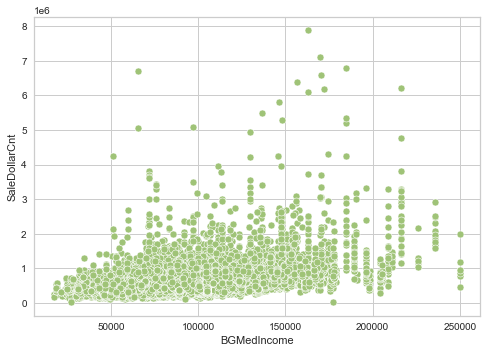

In [17]:
sns.scatterplot(x='BGMedIncome', y='SaleDollarCnt', data = df, color="g")
#sns.regplot(x=df.BGMedIncome, y=df.SaleDollarCnt);  # Creates Regression Line 

<AxesSubplot:xlabel='FinishedSquareFeet', ylabel='SaleDollarCnt'>

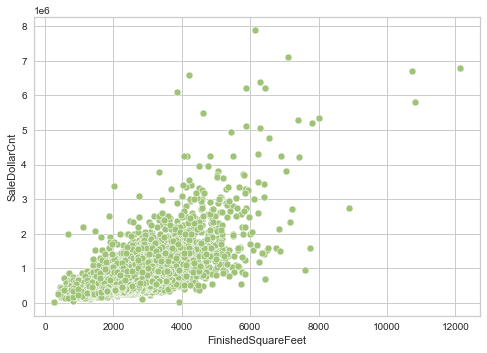

In [18]:
sns.scatterplot(x='FinishedSquareFeet', y='SaleDollarCnt', data = df, color="g")

As we can see, these plots confirm the correaltion values. There are a few outliers in the FinishedSqaureFeet plot, however they seem to be following the trend, so will keep them for now

------------------------------------------------------------------------------------------------------------------------------

# Multicollinerity

As discussed in the report, it is important to weed out features are correlated between themselves. This is one of the assumptions of linear regression. I identify obvious features in the heatmap but don't drop them as I will also be experimenting with other types of models (Trees)

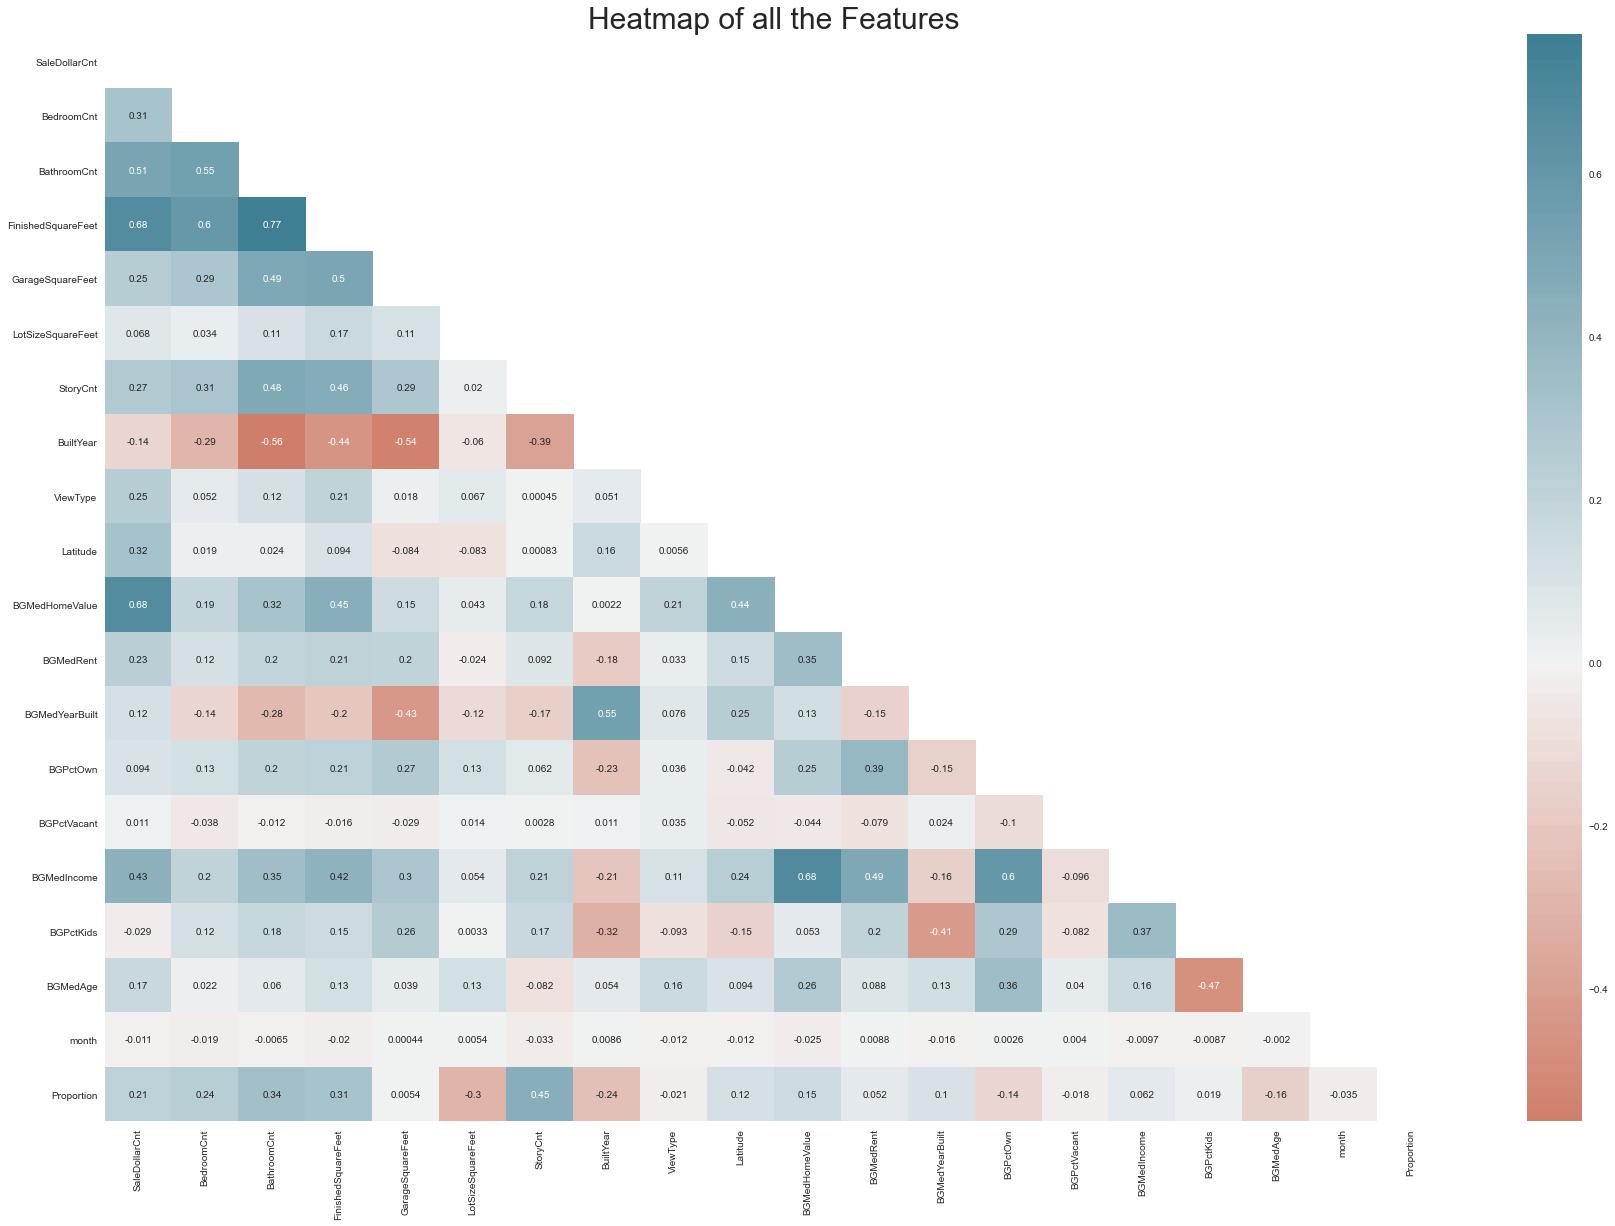

In [19]:
#Example taken from Seaborn Library

## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

------------------------------------------------------------------------------------------------------------------------------

# Fix Data Skewness

I use Skewness & Kurtosis tests to determine if the data is normally distributed. This is another assumption of linear regresison where the data needs to mimic Guassian Distribution. 

I also plot the distribution of the features to visualize the skewness

For XGBoost, we do not need to do this step. It does not depend on data being normally distributed

In [20]:
indexing = df_test.index
y = df['SaleDollarCnt'].reset_index(drop=True)
df = df.drop(['SaleDollarCnt'],axis=1)
df_test = df_test.drop(['SaleDollarCnt'],axis=1)
all_data = pd.concat((df, df_test)).reset_index(drop = True)         #Join all data to fix skewness once

#skewness and kurtosis
#print("Skewness: " + str(df['SaleDollarCnt'].skew()))
#print("Kurtosis: " + str(df['SaleDollarCnt'].kurt()))

print("Skewness: " + "\n" + str(all_data.skew()))
print("\n")
print("Kurtosis: " + "\n" + str(all_data.kurt()))

Skewness: 
BedroomCnt             0.453547
BathroomCnt            0.555094
FinishedSquareFeet     1.313188
GarageSquareFeet       1.340486
LotSizeSquareFeet     11.495144
StoryCnt               0.173230
BuiltYear              0.577537
ViewType               2.811142
Latitude              -0.374069
BGMedHomeValue         1.132427
BGMedRent              0.393191
BGMedYearBuilt         0.259599
BGPctOwn              -0.965295
BGPctVacant            2.237270
BGMedIncome            0.720548
BGPctKids              0.406189
BGMedAge               0.440433
month                  0.130911
Proportion             1.323711
dtype: float64


Kurtosis: 
BedroomCnt              2.295792
BathroomCnt             1.737157
FinishedSquareFeet      4.127092
GarageSquareFeet       25.197351
LotSizeSquareFeet     189.179146
StoryCnt               -1.404408
BuiltYear              -0.402322
ViewType                9.260696
Latitude               -0.845871
BGMedHomeValue          1.267040
BGMedRent              

The target variable is postively Skewed (Right tail) --> See Plot below

C:\Users\Usman Gohar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


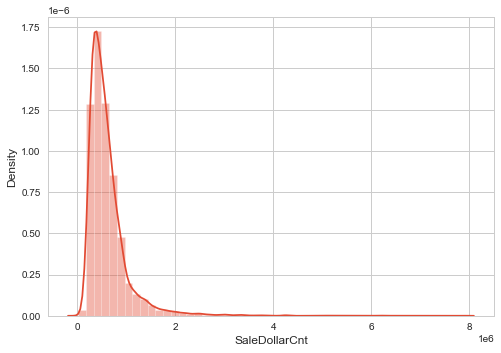

In [21]:
sns.distplot(y);

To fix the positive skeness in the target variable, I use the log transformation

In [22]:
#y = np.log1p(df['SaleDollarCnt'])

y = np.log1p(y)

Plot after transformation

C:\Users\Usman Gohar\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


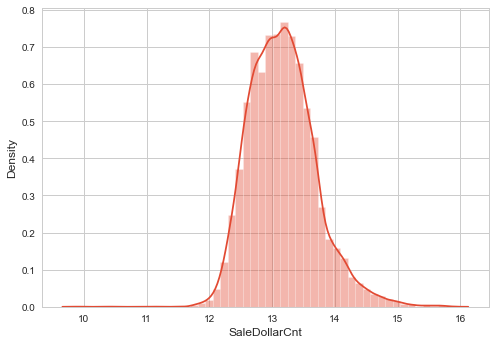

In [23]:
sns.distplot(y);

In [24]:
#This calculates the skewness of the independant variables

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index   ###################
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

LotSizeSquareFeet     11.494066
ViewType               2.810879
BGPctVacant            2.237060
GarageSquareFeet       1.340360
Proportion             1.323587
FinishedSquareFeet     1.313065
BGMedHomeValue         1.132321
BGMedIncome            0.720481
BuiltYear              0.577483
BathroomCnt            0.555042
BedroomCnt             0.453504
BGMedAge               0.440392
BGPctKids              0.406151
BGMedRent              0.393154
BGMedYearBuilt         0.259575
StoryCnt               0.173214
month                  0.130899
Latitude              -0.374034
BGPctOwn              -0.965205
dtype: float64

In [25]:
# Function to apply box-cox transformation

def skew_fix(df):
    
    features = df.dtypes[df.dtypes != "object"].index   # Pick only non-object data types
    skewed_feats = df[features].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]       #Only highly skewed features
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))


skew_fix(all_data)
#skew_fix(df)
#skew_fix(df_test)

In [26]:
# Skewness after Transformation

numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index   ###################
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_feats

ViewType              1.559926
BGPctVacant           0.486058
BedroomCnt            0.453504
GarageSquareFeet      0.450086
BGMedAge              0.440392
BGPctKids             0.406151
BGMedRent             0.393154
BGMedYearBuilt        0.259575
StoryCnt              0.173214
month                 0.130899
BathroomCnt           0.126193
BGMedHomeValue        0.064113
Proportion            0.034459
BGMedIncome           0.000029
FinishedSquareFeet   -0.000936
BuiltYear            -0.044410
LotSizeSquareFeet    -0.068686
BGPctOwn             -0.138309
Latitude             -0.374034
dtype: float64

------------------------------------------------------------------------------------------------------------------------------

In [27]:
# Retrieve Original Sets

X = all_data.iloc[:len(y), :]

X_test = all_data.iloc[len(y):, :]

#X_test

In [28]:
X

,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,BuiltYear,ViewType,Latitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,month,Proportion
0,4.0,1.529270,12.478727,239.577268,1.869790,1.0,15.141112,0.000000,47321389,20.882275,844.0,40.0,2.584288,0.059441,131.217714,0.1924,48.6,5,0.176928
1,3.0,1.529270,12.819096,168.561922,1.874595,1.0,17.340212,12.909099,47482082,22.456394,925.0,46.0,1.864356,0.017891,143.010996,0.3718,42.6,8,0.121467
2,4.0,0.850742,12.795195,286.479493,1.868499,1.0,16.986794,0.000000,47561383,24.498726,733.0,69.0,2.290133,0.000000,145.692040,0.3207,40.7,8,0.210190
3,4.0,1.682848,13.250378,0.000000,1.875232,1.0,15.709624,12.909099,47387929,23.873945,900.0,38.0,1.669793,0.046753,132.736664,0.3359,40.0,7,0.127436
4,4.0,1.370111,12.227420,0.000000,1.870995,2.0,18.203716,12.827232,47477068,23.940332,802.0,43.0,1.033753,0.045293,153.436460,0.1633,44.4,6,0.149019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11583,3.0,1.529270,13.240063,159.382785,1.856706,2.0,0.000000,0.000000,47733216,24.522508,1313.0,26.0,3.764541,0.000000,179.949033,0.4426,34.1,9,0.350714
11584,4.0,1.682848,13.453465,299.056513,1.865485,2.0,0.000000,0.000000,47455220,22.672825,1069.0,54.0,3.131743,0.000000,155.350549,0.4724,38.1,9,0.282140
11585,3.0,1.975573,13.544524,303.230363,1.864700,2.0,0.000000,0.000000,47502826,24.250859,696.0,43.0,3.590650,0.000000,185.302524,0.3475,34.4,9,0.295475
11586,4.0,1.975573,13.535164,256.785650,1.869447,2.0,0.000000,0.000000,47707734,25.012398,908.0,62.0,2.154334,0.000000,168.749869,0.2121,38.6,9,0.233823


In [29]:
X_test

,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,BuiltYear,ViewType,Latitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,month,Proportion
11588,5.0,2.641809,15.385954,0.000000,1.877729,1.0,19.531715,12.827232,47725642,25.930272,1750.0,59.0,5.484994,0.073994,188.298812,0.2524,49.6,10,0.159286
11589,5.0,2.115642,13.156240,252.500906,1.877849,1.0,14.948505,12.827232,47726993,25.930272,1750.0,59.0,5.484994,0.073994,188.298812,0.2524,49.6,11,0.081992
11590,4.0,1.529270,12.168459,0.000000,1.871111,2.0,21.418257,0.000000,47731749,25.930272,1750.0,59.0,5.484994,0.073994,188.298812,0.2524,49.6,10,0.144907
11591,2.0,0.850742,10.887769,140.768147,1.873607,1.0,19.531715,0.000000,47728810,25.930272,1750.0,59.0,5.484994,0.073994,188.298812,0.2524,49.6,11,0.071401
11592,4.0,2.115642,13.636572,269.573953,1.877387,1.0,17.688949,13.151246,47731170,25.930272,1750.0,59.0,5.484994,0.073994,188.298812,0.2524,49.6,12,0.103743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,3.0,1.529270,11.752128,0.000000,1.874312,2.0,7.494120,13.151246,47758782,22.441010,507.0,44.0,2.408230,0.147778,110.421372,0.1317,48.5,12,0.088961
15986,2.0,1.866430,10.187337,0.000000,1.873342,2.0,13.960118,0.000000,47713245,22.441010,507.0,44.0,2.408230,0.147778,110.421372,0.1317,48.5,12,0.056294
15987,2.0,0.850742,10.308070,0.000000,1.874988,2.0,13.135706,0.000000,47713748,22.441010,507.0,44.0,2.408230,0.147778,110.421372,0.1317,48.5,10,0.046911
15988,3.0,1.493061,12.912810,0.000000,1.875168,1.0,16.808262,0.000000,47760904,22.441010,507.0,44.0,2.408230,0.147778,110.421372,0.1317,48.5,11,0.116063


In [30]:
#df = df[['BGMedHomeValue', 'BathroomCnt', 'FinishedSquareFeet', 'SaleDollarCnt','BGMedIncome', 'Latitude', 'StoryCnt', 'ViewType', 'GarageSquareFeet','BuiltYear']]
#X = df.drop(['SaleDollarCnt'],axis=1)
#X_test = df_test  #[['BGMedHomeValue', 'BathroomCnt', 'FinishedSquareFeet','BGMedIncome', 'Latitude', 'StoryCnt', 'ViewType', 'GarageSquareFeet','BuiltYear']]
#indexing = X_test.index
#X_test

##### Scaling the Dataset. Scaling the data helps to reach convergence quickly & accurately

In [31]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test= scaler.transform(X_test)
#X_test = scaler.fit(X_test)

In [32]:
# This was for training purposes only. Used test set for final submission

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [33]:
X_train = X
y_train = y
#print(X_test.shape)
X_test

array([[ 1.78849368,  1.80566037,  2.52898874, ...,  1.46103298,
         2.13926773, -0.2058447 ],
       [ 1.78849368,  0.79678808,  0.46115705, ...,  1.46103298,
         2.74914877, -1.26107324],
       [ 0.63328505, -0.3275209 , -0.454908  , ...,  1.46103298,
         2.13926773, -0.40215473],
       ...,
       [-1.67713219, -1.62853079, -2.18022899, ...,  1.29749196,
         2.13926773, -1.7400105 ],
       [-0.52192357, -0.3969484 ,  0.23540142, ...,  1.29749196,
         2.74914877, -0.79593923],
       [-1.67713219, -1.62853079, -1.70935167, ...,  1.29749196,
         2.13926773, -1.28590849]])

------------------------------------------------------------------------------------------------------------------------------

# Model Training (Linear Regression)

In [34]:
linear_Model = LinearRegression(normalize=True)

linear_Model.fit(X_train,y_train)

LinearRegression(normalize=True)

In [35]:
predictions = linear_Model.predict(X_test)
predictions = np.expm1(predictions)   #Inverse log to get actual SaleDollarCnt values

In [36]:
# Used this to visualize the results against true values. Doesn't apply to final notebook

dfr = pd.DataFrame({'y_test': np.expm1(y_test),'predictions': predictions})
dfr

NameError: name 'y_test' is not defined

In [37]:
test_result = pd.DataFrame({'PropertyID': indexing, 'predictions': predictions})
test_result

,PropertyID,predictions
0,48735321,1.405776e+06
1,48735471,8.792134e+05
2,49128764,6.249304e+05
3,48897535,4.736221e+05
4,49083957,9.963408e+05
...,...,...
4397,49034257,3.563023e+05
4398,49101515,2.281468e+05
4399,49092758,2.206405e+05
4400,49034232,3.955268e+05


In [38]:
linear_Model.score(X_train, y_train)

0.8313606065726724

Used MSE & MAPE Scores to determine model

In [ ]:
#print(np.sqrt(metrics.mean_squared_error(np.expm1(y_test),predictions)))

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:
mean_absolute_percentage_error(np.expm1(y_test),predictions)

# Lasso CV

To prevent over-fitting, I used Lasso Regression. It imposes penalities which causes the regression coefficients to shrink towards zero. At the same time, it also helps in feature selection, picking features that minimizes prediction error


In [39]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [40]:
best_alpha = 1e-15
regr = Lasso(alpha=best_alpha, max_iter=50000)

In [41]:
regr.fit(X_train,y_train)

Lasso(alpha=1e-15, max_iter=50000)

In [42]:
predictions = regr.predict(X_test)
predictions = np.expm1(predictions)

In [43]:
#mean_absolute_percentage_error(np.expm1(y_test),np.expm1(predictions))

In [ ]:
sns.residplot(df.FinishedSquareFeet, df.SaleDollarCnt);

In [ ]:
fig = plt.figure()
res = stats.probplot(df['SaleDollarCnt'], plot=plt)
plt.show()

##### This plot visualizes the residual and their normal distribution, indicating a good fit. Was used when building the regression model

In [ ]:
visualizer = ResidualsPlot(linear_Model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

------------------------------------------------------------------------------------------------------------------------------

# Model Training (XGBoost)

In [88]:
xgboost1 = xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, gamma=0, subsample=0.75,
                            colsample_bytree=0.7,loss='huber', max_depth=7, min_child_weight = 4, objective = 'reg:linear', max_features='sqrt', nthread=-1,
                            scale_pos_weight=1)

In [89]:
xgboost1.fit(X_train,y_train)

[17:37:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:37:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { loss, max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, loss='huber', max_delta_step=0, max_depth=7,
             max_features='sqrt', min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=-1, nthread=-1,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
predictions = xgboost1.predict(X_test)
predictions = np.expm1(predictions)

In [91]:
dfr = pd.DataFrame({'PropertyID': indexing, 'SaleDollarCnt': predictions})
dfr

,PropertyID,SaleDollarCnt
0,48735321,2.039147e+06
1,48735471,9.440528e+05
2,49128764,5.298016e+05
3,48897535,4.100739e+05
4,49083957,1.166914e+06
...,...,...
4397,49034257,2.390492e+05
4398,49101515,9.131253e+04
4399,49092758,9.248500e+04
4400,49034232,2.796223e+05


In [92]:
dfr = pd.DataFrame({'PropertyID': indexing, 'SaleDollarCnt': predictions})
dfr

,PropertyID,SaleDollarCnt
0,48735321,2.039147e+06
1,48735471,9.440528e+05
2,49128764,5.298016e+05
3,48897535,4.100739e+05
4,49083957,1.166914e+06
...,...,...
4397,49034257,2.390492e+05
4398,49101515,9.131253e+04
4399,49092758,9.248500e+04
4400,49034232,2.796223e+05


Evaluation

- As shown in the report, I compare the Feature Importance graphs before & after feature additions.
- BuiltYear becomes the 4th most important feature.
- Latitude acutally is the top most feature suprisingly This suggest ZoneCode can also be leveraged for a good prediction

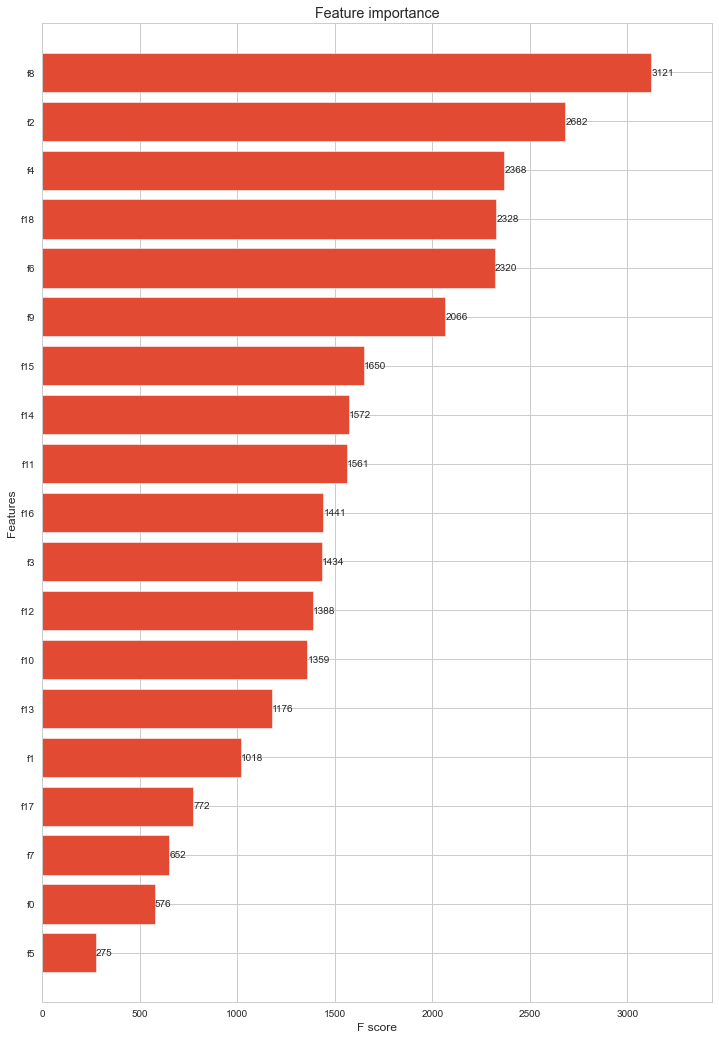

In [93]:
# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(xgboost1, max_num_features=100, height=0.8, ax=ax)
plt.show()

In [94]:
dfr.to_csv('Gohar_Usman_Predictions.csv', index=False)

In [ ]:
mean_absolute_percentage_error(np.expm1(y_test),(predictions))

In [ ]:
dfr = pd.DataFrame({"Real": np.expm1(y_test),'predictions': predictions})
dfr

------------------------------------------------------------------------------------------------------------------------------

# Experiments & Parameter Tuning

This was done when I split the training set into train & test sets. Helped pick the best parameters & features

# Lasso Alpha

In [ ]:
#Search for best alpha value based on minimizing mse & rss values

alpha_lasso = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
from sklearn.linear_model import Lasso 
temp_rss = {}
temp_mse = {}
for i in alpha_lasso:
    ## Assigin each model. 
    lasso_reg = Lasso(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = metrics.mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss
    
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

In [ ]:
for key, value in sorted(temp_rss.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

------------------------------------------------------------------------------------------------------------------------------

# GridSearch
Used GridSearch to tune parameters for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7, 1.4, 1, 2],
              'n_estimators': [100, 200, 300, 500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train,y_train)
X_train.shape
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-----------------------------------------------------------------------------------------------------------------------------

## Stacking

The reason behind stacking the models is that it averages out the performance of the models and has an overall better average performanc eon unseen data. In future, I would like to explore this a bit more and also experiment with blending.

Models I used were Ridge, Lasso & XGBoost

In [81]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler


alpha_lasso = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
alphas_ridge = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=50000, 
                                              alphas=alpha_lasso, 
                                              random_state=42, 
                                              cv=kfolds))
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_ridge, cv=kfolds))
xgboost = xgb.XGBRegressor(n_estimators=500, learning_rate=0.03, gamma=0, subsample=0.75,
                            colsample_bytree=0.7,loss='huber', max_depth=7, min_child_weight = 4, objective = 'reg:linear', max_features='sqrt', nthread=-1,
                            scale_pos_weight=1, seed=27, reg_alpha=0.00006)

In [ ]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(lasso,xgboost1),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)


In [ ]:
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSLE score on train data:')
#print(rmsle(np.expm1(y_test), np.expm1(stack_gen_model.predict(np.array(X_test)))))
print(rmsle(np.expm1(y_train), np.expm1(stack_gen_model.predict(np.array(X_train)))))


In [ ]:
#dfr = pd.DataFrame({'PropertyID': X_test.index, "Real": np.expm1(y_test),'predictions': np.expm1(stack_gen_model.predict(np.array(X_test)))})
dfr = pd.DataFrame({'PropertyID': indexing,'predictions': np.expm1(stack_gen_model.predict(np.array(X_test)))})

dfr

In [ ]:
mean_absolute_percentage_error(np.expm1(y_test),np.expm1(stack_gen_model.predict(np.array(X_test))))

-------------------------------------------------------------------------------------------------------------------------------

## Experimental Work

### ZoneCodeCounty feature engineering

I did not get a good result and the features did not do well in the feature importance graphs. So subsequently did not use the zonecodecounty


In [ ]:
#Example taken from Human Analog notebook on Kaggle to convert ZoneCode into labels. 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def factorize(df, factor_df, column, fill_na=None):
    factor_df[column] = df[column]
    if fill_na is not None:
        factor_df[column].fillna(fill_na, inplace=True)
    le.fit(factor_df[column].unique())
    factor_df[column] = le.transform(factor_df[column])
    return factor_df

In [ ]:
all_df = pd.DataFrame(index = df.index)
all_df = factorize(df, all_df, "ZoneCodeCounty")

In [ ]:
all_df

 ---------------------------------------------------------------------------------------------------------------------------


### The idea here was to see if the traditional "Hot" Real-Estate months have more activity. Turns out, it didn't really help and there were no purchases outside those months in the training set and testing set had no purchases within these months

In [ ]:
all_data['HighSeason'].value_counts()

In [ ]:
all_data["HighSeason"] = all_data["month"].replace( 
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8:1, 9: 1, 10: 0, 11: 0, 12: 0})